In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#!pip install autokeras

/kaggle/input/jpx-network-models-features/graph9999.gpickle
/kaggle/input/jpx-network-models-features/fullgraph.gpickle
/kaggle/input/jpx-network-models-features/submission.csv
/kaggle/input/jpx-network-models-features/network_features.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_t

参考:https://www.kaggle.com/code/tatsuyafujii/eda-jp-tokyo-stock-1

In [2]:
fin_df=pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv")


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
prices=pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv",parse_dates=["Date"])
print(prices.shape)
prices.head()

(195993, 12)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867


In [4]:
#欠損値確認
print(prices.isnull().sum())
#データの型を確認
print(prices.dtypes)

RowId                    0
Date                     0
SecuritiesCode           0
Open                   591
High                   591
Low                    591
Close                  591
Volume                   0
AdjustmentFactor         0
ExpectedDividend    194037
SupervisionFlag          0
Target                   4
dtype: int64
RowId                       object
Date                datetime64[ns]
SecuritiesCode               int64
Open                       float64
High                       float64
Low                        float64
Close                      float64
Volume                       int64
AdjustmentFactor           float64
ExpectedDividend           float64
SupervisionFlag               bool
Target                     float64
dtype: object


591ってなんの数字？
ExpectedDividendは一回除去する？

In [5]:
prices.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,195993.000000,195402.000000,195402.000000,195402.000000,195402.000000,1.959930e+05,195993.000000,1956.000000,195989.000000
mean,5883.100488,2626.154778,2658.556070,2589.402094,2623.911886,6.235170e+05,0.999949,32.684882,-0.000538
std,2389.743578,4151.595680,4201.974233,4092.703559,4146.718185,2.482682e+06,0.005220,55.208573,0.023798
min,1301.000000,35.000000,36.000000,34.000000,34.000000,0.000000e+00,0.333333,0.000000,-0.355000
25%,3916.000000,1013.000000,1025.000000,1001.000000,1012.000000,3.340000e+04,1.000000,10.000000,-0.012243
50%,6201.000000,1784.000000,1805.000000,1761.000000,1783.000000,9.910000e+04,1.000000,21.000000,0.000000
75%,7937.000000,2926.000000,2962.000000,2889.000000,2925.000000,3.785000e+05,1.000000,40.000000,0.010870
max,9997.000000,79030.000000,79250.000000,78600.000000,79080.000000,1.582883e+08,1.000000,1080.000000,0.597907


In [6]:
#始値が欠損ということは出来高が0ということかどうか
(prices["Open"].isnull()==(prices["Volume"]==0)).all()

True

始値:ある期間の取引において、最初に成立した売買価格のこと
出来高:期間中に成立した売買の数量


In [7]:
#それぞれの銘柄の数を数えると欠損が見えてくるはず.sore_valuesで昇順にしたので欠損がわかる
prices["SecuritiesCode"].value_counts().sort_values()

1413    94
8806    95
4493    98
1376    98
1377    98
        ..
9994    98
9900    98
9896    98
9974    98
6201    98
Name: SecuritiesCode, Length: 2000, dtype: int64

1413が4欠損、8806が3欠損。他はなし

In [8]:
#欠損銘柄専用のデータフレームを作る(これ最後じゃなかったらどうするんだ...?)
pd.pivot(prices,index="Date",columns="SecuritiesCode",values="Close")[[1413,8806]]

SecuritiesCode,1413,8806
Date,,
2021-12-06,2190.0,2210.0
2021-12-07,2250.0,2209.0
2021-12-08,2255.0,2250.0
2021-12-09,2263.0,2298.0
2021-12-10,2251.0,2240.0
...,...,...
2022-04-22,2337.0,2197.0
2022-04-25,NaN,2200.0
2022-04-26,NaN,NaN


Target:1日後と二日後の差額からえられる収益率。
securitiessCode:銘柄コード。2000種。

In [9]:
#Targetの算出が合っているのか確認？

print(prices["Target"].head())
print(prices.groupby("SecuritiesCode")["Close"].apply(lambda s:(s.shift(-2)-s.shift(-1))/s.shift(-1)).head())


0   -0.003263
1   -0.008993
2   -0.009963
3   -0.015032
4    0.002867
Name: Target, dtype: float64
0   -0.003263
1   -0.008993
2   -0.009963
3   -0.015032
4    0.002867
Name: Close, dtype: float64


ほんとはもっと確認してるけどめんどいのでカット

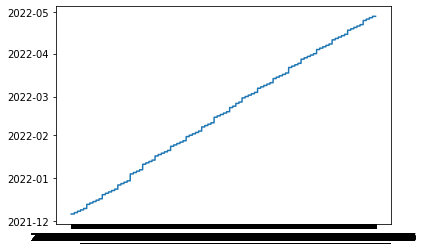

In [10]:
import matplotlib.pyplot as plt
x=prices.iloc[:,0]
y=prices.iloc[:,1]

plt.plot(x,y)
plt.show()

In [11]:
#import autokeras

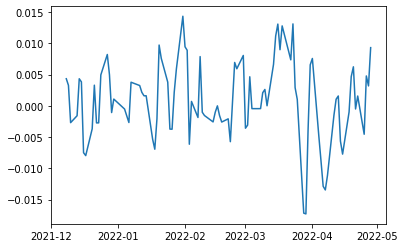

In [12]:
import matplotlib.pyplot as plt
y=prices[prices["SecuritiesCode"]==1301]["Target"].rolling(window=3).mean()
x=prices[prices["SecuritiesCode"]==1301]["Date"]

plt.plot(x,y)
plt.show()


In [13]:
prices[prices["SecuritiesCode"]==1301]["Target"]

0        -0.003263
2000      0.009820
4000      0.006483
6000     -0.006441
8000     -0.008104
            ...   
186000    0.013975
188000   -0.019908
189999    0.020312
191997    0.009188
193995   -0.001517
Name: Target, Length: 98, dtype: float64